In [53]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [54]:
oscar = pd.read_csv('oscar.csv')
oscar.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year_film,year_ceremony,ceremony,category,name,film,winner,Number of wins,runtime
0,0,5,5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False,3,94
1,1,60,90,1929,1930,3,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,False,2,152
2,2,94,162,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,1,120
3,3,128,236,1932,1933,6,DIRECTING,George Cukor,Little Women,False,3,115
4,4,146,266,1934,1935,7,ACTOR,Clark Gable,It Happened One Night,True,5,105


In [55]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      434 non-null    int64 
 1   Unnamed: 0.1    434 non-null    int64 
 2   Unnamed: 0.1.1  434 non-null    int64 
 3   year_film       434 non-null    int64 
 4   year_ceremony   434 non-null    int64 
 5   ceremony        434 non-null    int64 
 6   category        434 non-null    object
 7   name            434 non-null    object
 8   film            434 non-null    object
 9   winner          434 non-null    bool  
 10  Number of wins  434 non-null    int64 
 11  runtime         434 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 37.8+ KB


In [56]:
# Numeric Predictors
oscar['runtime'].describe()

count    434.000000
mean     126.394009
std       28.215176
min       24.000000
25%      108.000000
50%      123.000000
75%      138.000000
max      242.000000
Name: runtime, dtype: float64

Winners : 2
False    312
True     122
Name: winner, dtype: int64


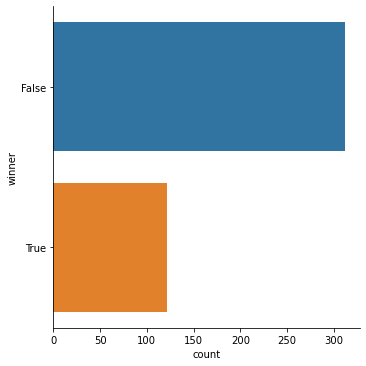

In [57]:
# Generations in the Dataset
print("Winners :", len(oscar["winner"].unique()))

# Pokemons in each Generation
print(oscar["winner"].value_counts())
sb.catplot(y = "winner", data = oscar, kind = "count")

In [58]:
run = pd.DataFrame(oscar[["runtime"]])  # Response
win = pd.DataFrame(oscar["winner"])      # Predictor

In [59]:
# Train Set : 600 samples
win_train = pd.DataFrame(win[:600])
run_train = pd.DataFrame(run[:600])

# Test Set : 200 samples
win_test = pd.DataFrame(win[-200:])
run_test = pd.DataFrame(run[-200:])

# Check the sample sizes
print("Train Set :", run_train.shape, win_train.shape)
print("Test Set  :", run_test.shape, win_test.shape)

Train Set : (434, 1) (434, 1)
Test Set  : (200, 1) (200, 1)


In [60]:
type(run_train["runtime"])

pandas.core.series.Series

In [61]:
# Summary Statistics for Legendary Train
run_train["runtime"].value_counts()

130    13
120    12
122    11
110    10
112    10
       ..
160     1
163     1
164     1
166     1
242     1
Name: runtime, Length: 115, dtype: int64

In [62]:
# Summary Statistics for Total Train
win_train.describe()

,winner
count,434
unique,2
top,False
freq,312


<AxesSubplot:xlabel='runtime', ylabel='Count'>

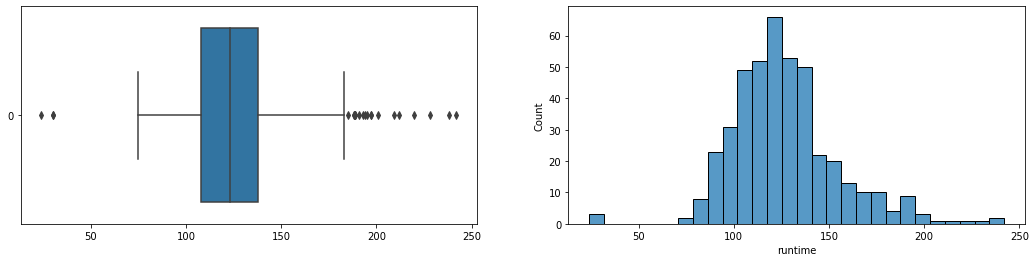

In [63]:
# Amount of the Credit
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = oscar['runtime'], orient = "h", ax = axes[0])
sb.histplot(data = oscar['runtime'], ax = axes[1])

<AxesSubplot:xlabel='winner', ylabel='runtime'>

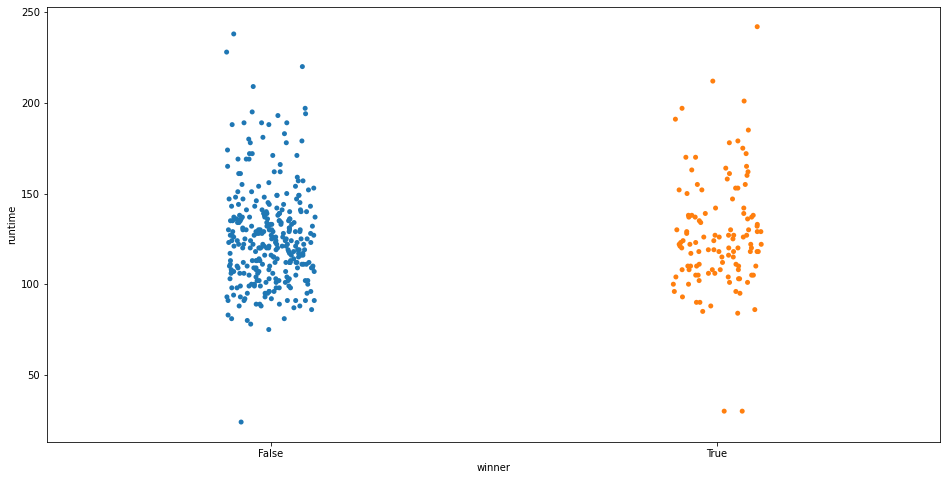

In [64]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'winner', y = 'runtime', data = oscar)

In [65]:
for d in range(0, len(oscar)):
    if oscar['winner'].loc[d] == True:
        oscar['winner'].loc[d] = 'Win'
    else:
        oscar['winner'].loc[d] = 'No Win'
oscar

C:\Users\kyong\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year_film,year_ceremony,ceremony,category,name,film,winner,Number of wins,runtime
0,0,5,5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,No Win,3,94
1,1,60,90,1929,1930,3,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,No Win,2,152
2,2,94,162,1931,1932,5,ACTRESS,Marie Dressler,Emma,No Win,1,120
3,3,128,236,1932,1933,6,DIRECTING,George Cukor,Little Women,No Win,3,115
4,4,146,266,1934,1935,7,ACTOR,Clark Gable,It Happened One Night,Win,5,105
...,...,...,...,...,...,...,...,...,...,...,...,...
429,429,4798,10289,2019,2020,92,ANIMATED FEATURE FILM,"Sergio Pablos, Jinko Gotoh and Marisa Román",Klaus,No Win,0,96
430,430,4802,10295,2019,2020,92,CINEMATOGRAPHY,Roger Deakins,1917,Win,3,119
431,431,4803,10306,2019,2020,92,DIRECTING,Bong Joon Ho,Parasite,Win,4,132
432,432,4814,10317,2019,2020,92,FILM EDITING,Michael McCusker and Andrew Buckland,Ford v Ferrari,Win,2,152


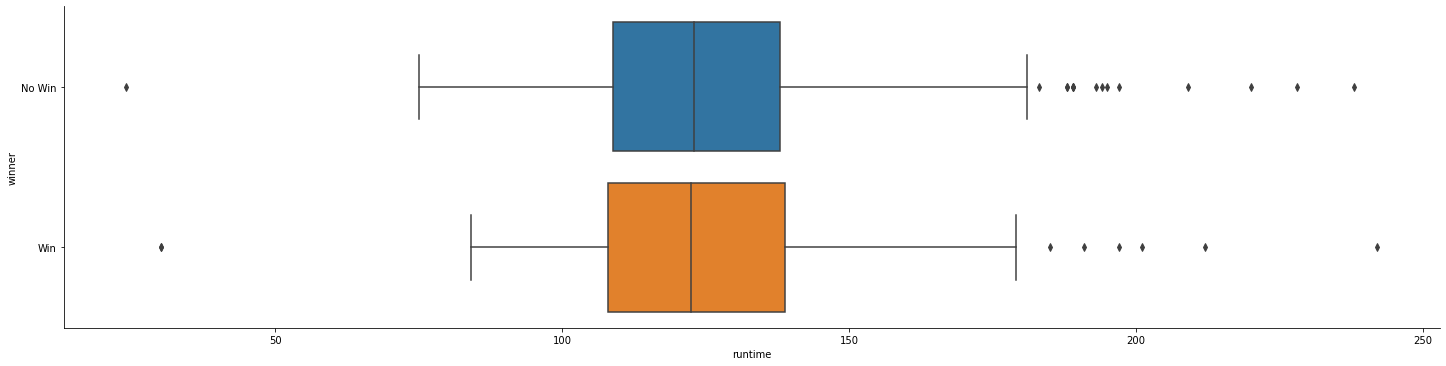

In [66]:
sb.catplot(x='runtime',y='winner',data=oscar,kind='box', orient="h",aspect=4)